In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def combine_directory_parquets(directory_path):
    if directory_path[-1] != '/':
        directory_path += '/'
    file_list = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
    combined_df = pd.concat([pd.read_parquet(directory_path + f) for f in file_list])
    return combined_df

In [46]:
def extract_and_aggregate_hsv(data):
    # Filter out HSV columns and the class column
    class_column = data[['Class']]
    hsv_columns = data.filter(regex='HSV_')

    # Assuming the columns for Hue are the first third, Saturation the second third, Value the last third
    num_hsv_features = len(hsv_columns.columns)
    third = num_hsv_features // 3
    hue_columns = hsv_columns.iloc[:, :third]
    saturation_columns = hsv_columns.iloc[:, third:2*third]
    value_columns = hsv_columns.iloc[:, 2*third:]

    # Aggregate the data points for each feature within each class
    data['Hue'] = hue_columns.mean(axis=1)
    data['Saturation'] = saturation_columns.mean(axis=1)
    data['Value'] = value_columns.mean(axis=1)

    # Return the data with the HSV columns collapsed to their average
    return data[['Class', 'Hue', 'Saturation', 'Value']]

In [47]:
def plot_hsv_histograms(avg_data):
    # Define the number of bins for the histogram
    bins = 50  # Number of bins can be adjusted to your preference

    # Iterate over each class to plot the histograms
    for class_name in avg_data['Class'].unique():
        # Filter the rows for the current class
        class_data = avg_data[avg_data['Class'] == class_name]

        # Create histograms for each HSV component
        plt.figure(figsize=(15, 5))
        
        # Hue
        plt.subplot(1, 3, 1)
        plt.hist(class_data['Hue'], bins=bins, color='red', alpha=0.7)
        plt.title(f'{class_name} Hue Distribution')
        plt.xlabel('Hue')
        plt.ylabel('Frequency')

        # Saturation
        plt.subplot(1, 3, 2)
        plt.hist(class_data['Saturation'], bins=bins, color='green', alpha=0.7)
        plt.title(f'{class_name} Saturation Distribution')
        plt.xlabel('Saturation')

        # Value
        plt.subplot(1, 3, 3)
        plt.hist(class_data['Value'], bins=bins, color='blue', alpha=0.7)
        plt.title(f'{class_name} Value Distribution')
        plt.xlabel('Value')

        plt.suptitle(f'HSV Distributions for {class_name}')
        plt.tight_layout()
        plt.show()

In [48]:
# Combine training and test datasets
train_data = combine_directory_parquets('../../../Data/Features/All Features/train')
test_data = combine_directory_parquets('../../../Data/Features/All Features/test')
combined_data = pd.concat([train_data, test_data]) 

In [49]:
# Extract and aggregate HSV data
hsv_aggregated_data = extract_and_aggregate_hsv(combined_data)

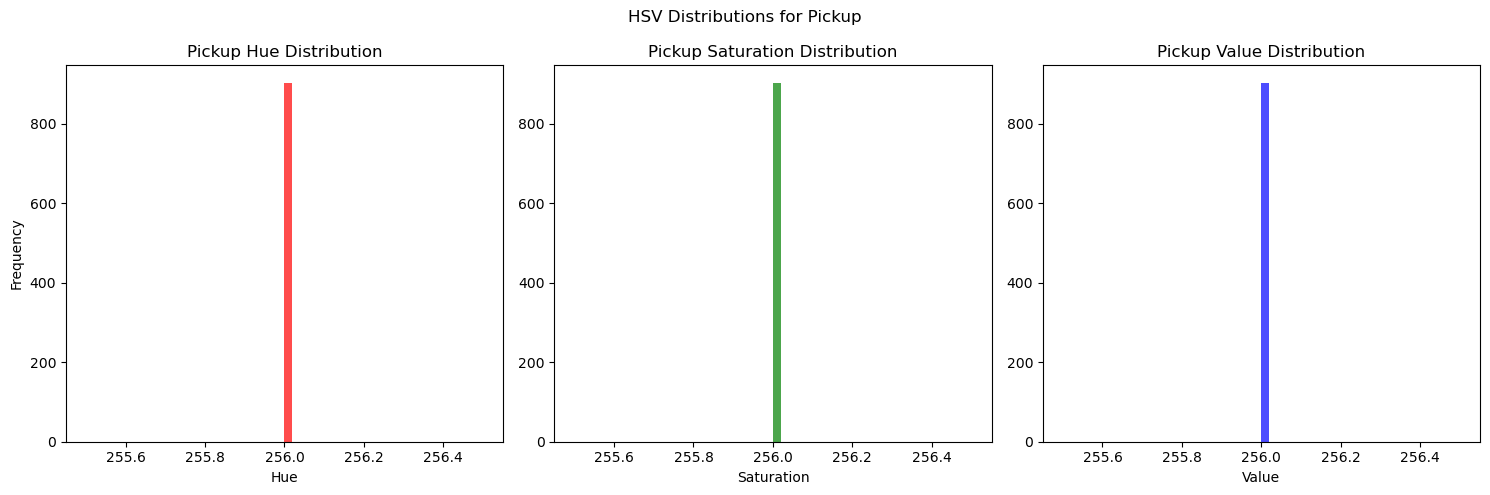

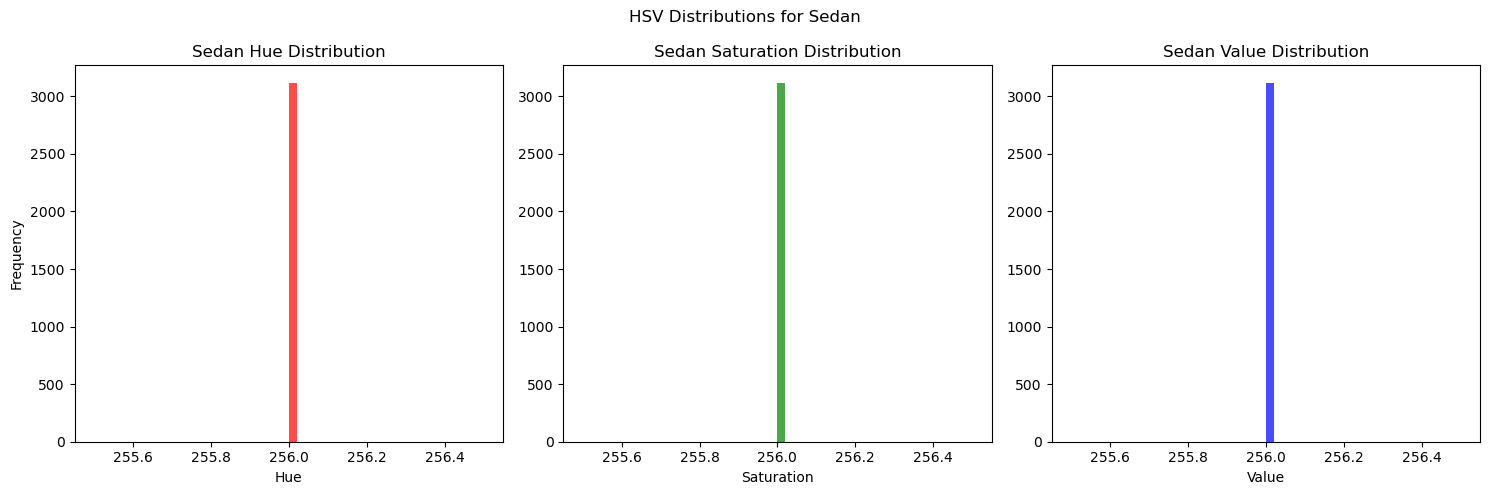

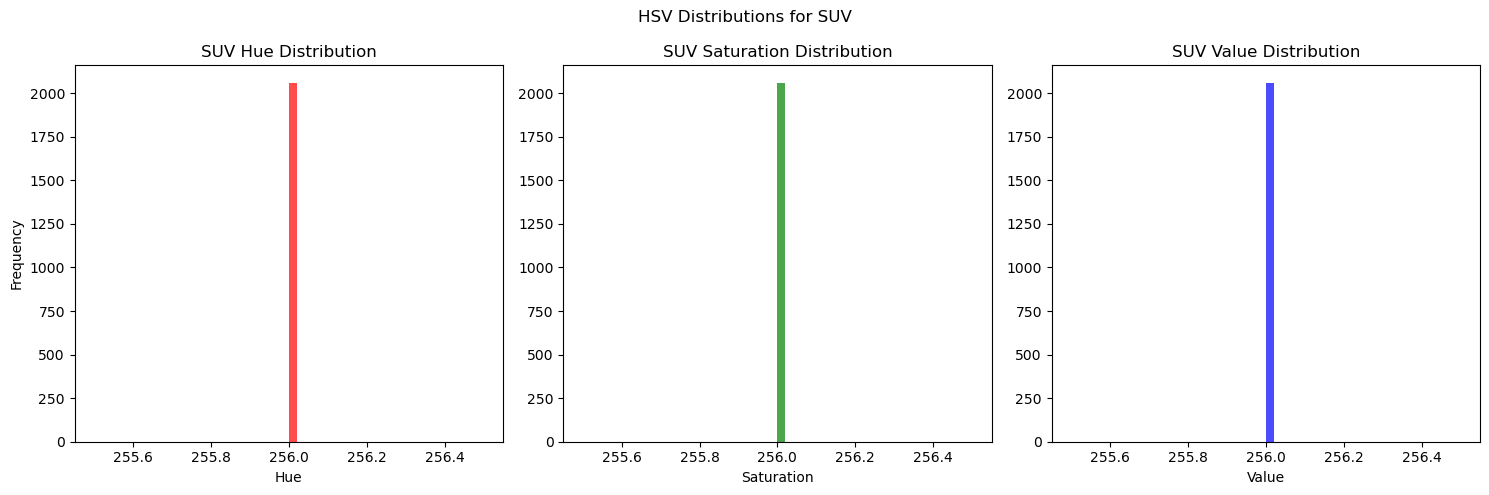

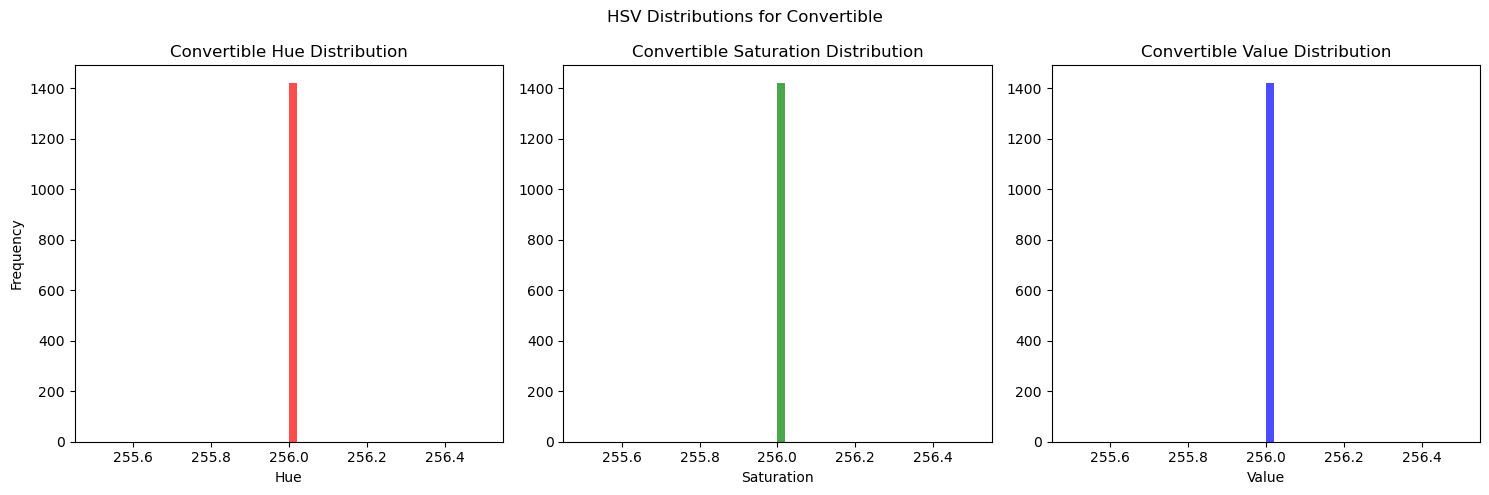

In [50]:
# Plot HSV histograms for each class
plot_hsv_histograms(hsv_aggregated_data)